In [5]:
import numpy as np
import pandas as pd

In [6]:
#Read Data
df = pd.read_csv('train.csv')
df.drop('PassengerId',axis=1,inplace=True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
print 'Total number of datasets:' , df.shape[0]
print 'For each column, non-Nan values:'
print  df.count(axis=0)
print 'Number of survivals 1:', df['Survived'].sum()

Total number of datasets: 891
For each column, non-Nan values:
Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64
Number of survivals 1: 342


In [8]:
#Split data before imputation and pre-processing
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=7)

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

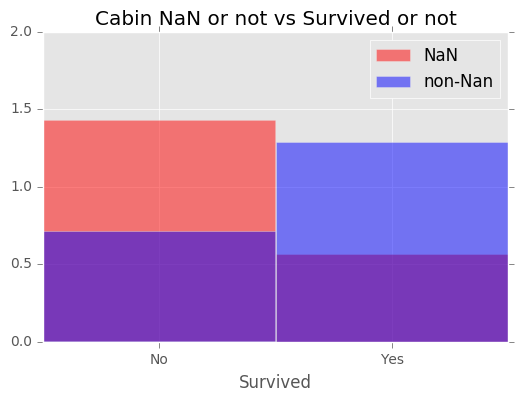

In [10]:
#Check what's special for cabin feature
plt.hist(df_train.ix[pd.isnull(df['Cabin']),'Survived'],bins = 2,normed = True, alpha = 0.5, color = 'r',label = 'NaN')
plt.hist(df_train.ix[~pd.isnull(df['Cabin']),'Survived'],bins = 2,normed = True, alpha = 0.5, color = 'b', label = 'non-Nan')
plt.title('Cabin NaN or not vs Survived or not')
plt.legend()
plt.xlabel('Survived')
plt.xticks([0.25,0.75],['No','Yes'])
plt.ylim([0,2.0])
plt.show()

It seems it was not likely to survive if he or she didn't have a cabin or had a missing cabin value. Thus we could replace feature cabin with dummy variable, if had a cabin value.

In [11]:
#Replace NA in Cabin with 1 and non-NA with 0
df_train.loc[~pd.isnull(df_train['Cabin']),['Cabin']] = 0
df_test.loc[~pd.isnull(df_test['Cabin']),['Cabin']] = 0
df_train.loc[pd.isnull(df_train['Cabin']),['Cabin']] = 1
df_test.loc[pd.isnull(df_test['Cabin']),['Cabin']] = 1

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
#Replace NA entries in Embarked with Mode and convert Embarked into numbers(C:0, S:1, Q:2)
df_train.loc[pd.isnull(df_train['Embarked']),['Embarked']] = df_train['Embarked'].mode()[0]
df_test.loc[pd.isnull(df_test['Embarked']),['Embarked']] = df_train['Embarked'].mode()[0]
df_train.loc[:,'Embarked'] = df.Embarked.map({'C':0,'S':1,'Q':2})
df_test.loc[:,'Embarked'] = df_test.Embarked.map({'C':0,'S':1,'Q':2})

In [13]:
#Convert Gender as number (female=1, male=0)
df_train.loc[:,'Sex'] = df_train.Sex.map({'female':1,'male':0})
df_test.loc[:,'Sex'] = df_test.Sex.map({'female':1,'male':0})

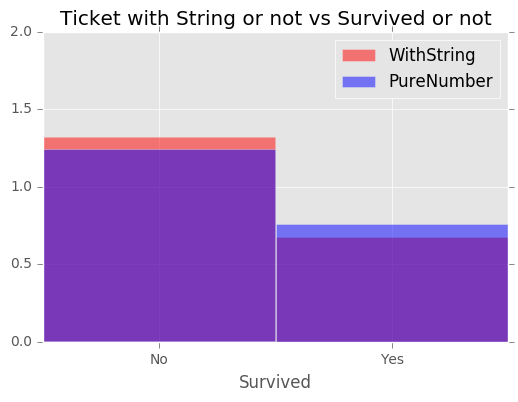

In [14]:
#Check what's special in feature Ticket
plt.hist(df_train.ix[pd.isnull(pd.to_numeric(df_train['Ticket'],errors = 'coerce')),'Survived'],bins = 2,normed = True, alpha = 0.5, color = 'r',label = 'WithString')
plt.hist(df_train.ix[~pd.isnull(pd.to_numeric(df_train['Ticket'],errors = 'coerce')),'Survived'],bins = 2,normed = True, alpha = 0.5, color = 'b',label = 'PureNumber')
plt.title('Ticket with String or not vs Survived or not')
plt.legend()
plt.xlabel('Survived')
plt.xticks([0.25,0.75],['No','Yes'])
plt.ylim([0,2.0])
plt.show()

No big difference for tickets with string or not

In [15]:
#drop ticket column
df_train.drop('Ticket',axis=1,inplace=True)
df_test.drop('Ticket',axis=1,inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Extracting title from name might be helpful in predicting missing value of age.

In [16]:
Name_Temp_train = df_train['Name'].str.split(', ',expand=True).iloc[:,1].str.split('.',expand=True).iloc[:,0]
Name_Temp_test = df_test['Name'].str.split(', ',expand=True).iloc[:,1].str.split('.',expand=True).iloc[:,0]
emp_train = {}
emp_test = {}
for name_train in Name_Temp_train:
    if name_train in emp_train.keys():
        emp_train[name_train] += 1
    else:
        emp_train[name_train] = 1
for name_test in Name_Temp_test:
    if name_test in emp_test.keys():
        emp_test[name_test] += 1
    else:
        emp_test[name_test] = 1
print "Prefix frequency among training set: ",emp_train
print "Prefix frequency among testing set: ",emp_test

Prefix frequency among training set:  {'Sir': 1, 'Major': 1, 'the Countess': 1, 'Don': 1, 'Mlle': 1, 'Capt': 1, 'Dr': 4, 'Rev': 6, 'Mrs': 81, 'Jonkheer': 1, 'Master': 27, 'Ms': 1, 'Mr': 360, 'Mme': 1, 'Miss': 134, 'Col': 2}
Prefix frequency among testing set:  {'Major': 1, 'Mlle': 1, 'Dr': 3, 'Lady': 1, 'Mrs': 44, 'Master': 13, 'Mr': 157, 'Miss': 48}


In [17]:
rare = ['Sir','Major','the Countess','Don','Capt','Dr','Lady','Rev','Jonkheer','Col','Master']
Name_Temp_train[Name_Temp_train == 'Mlle'] = 'Miss'
Name_Temp_train[Name_Temp_train == 'Ms'] = 'Miss'
Name_Temp_train[Name_Temp_train == 'Mme'] = 'Mrs'
Name_Temp_test[Name_Temp_test == 'Mlle'] = 'Miss'
Name_Temp_test[Name_Temp_test == 'Ms'] = 'Miss'
Name_Temp_test[Name_Temp_test == 'Mme'] = 'Mrs'
ind_train = []
ind_test = []
for i in Name_Temp_train: 
    ind_train.append(i in rare)
for i in Name_Temp_test: 
    ind_test.append(i in rare)
Name_Temp_train[ind_train] = 'Rare'
Name_Temp_test[ind_test] = 'Rare'
df_train.loc[:,'Name'] = Name_Temp_train
df_test.loc[:,'Name'] = Name_Temp_test

In [18]:
#Convert Name into numbers('Miss':0, 'Mrs':1, 'Mr':2, 'Rare':3)
df_train.loc[:,'Name'] = df_train.Name.map({'Miss':0, 'Mrs':1, 'Mr':2, 'Rare':3})
df_test.loc[:,'Name'] = df_test.Name.map({'Miss':0, 'Mrs':1, 'Mr':2, 'Rare':3})

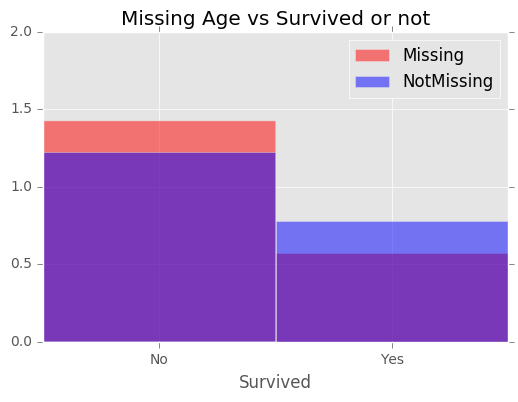

In [19]:
#Check age
plt.hist(df_train.ix[pd.isnull(df_train['Age']),'Survived'],bins = 2,normed = True, alpha = 0.5, color = 'r',label = 'Missing')
plt.hist(df_train.ix[~pd.isnull(df_train['Age']),'Survived'],bins = 2,normed = True, alpha = 0.5, color = 'b',label = 'NotMissing')
plt.title('Missing Age vs Survived or not')
plt.legend()
plt.xlabel('Survived')
plt.xticks([0.25,0.75],['No','Yes'])
plt.ylim([0,2.0])
plt.show()

In [20]:
print "Survival Status | NA in age | Non-NA in age | Total"
print "Survived         ", df_train['Survived'][pd.isnull(df_train['Age'])].sum(),"        " ,df_train['Survived'][~pd.isnull(df_train['Age'])].sum(),"           " ,df_train['Survived'].sum()
print "Non-Survived     ", df_train['Survived'][((pd.isnull(df_train['Age'])) & (df_train['Survived'] == 0))].count(),"        ", df_train['Survived'][((~pd.isnull(df_train['Age'])) & (df_train['Survived'] == 0))].count(),"           " , df_train['Survived'][df_train['Survived']==0].count()
print "Total            ", df_train['Survived'][pd.isnull(df_train['Age'])].count(),"       " , df_train['Survived'][~pd.isnull(df_train['Age'])].count(),"           " , df_train['Survived'].count()

Survival Status | NA in age | Non-NA in age | Total
Survived          35          195             230
Non-Survived      87          306             393
Total             122         501             623


In [21]:
#Chi-Square Test of independence between missing in age and survival
from scipy.stats import chisquare
chisquare([35,195,87,306],f_exp = [122*230/623,501*230/623,122*393/623,501*393/623])

Power_divergenceResult(statistic=4.7883918772348224, pvalue=0.18796428603849746)

Chi-Squre test shows missingness among age is independent to the status of survival. Thus we could regard it as MCAR (Missing Completely at Random). Thus it will be fine to impute missing age with mode. 

In [22]:
#Impute missing value with mode
df_train.loc[pd.isnull(df_train['Age']),['Age']] = df_train['Age'].mode()[0]
df_test.loc[pd.isnull(df_test['Age']),['Age']] = df_train['Age'].mode()[0]

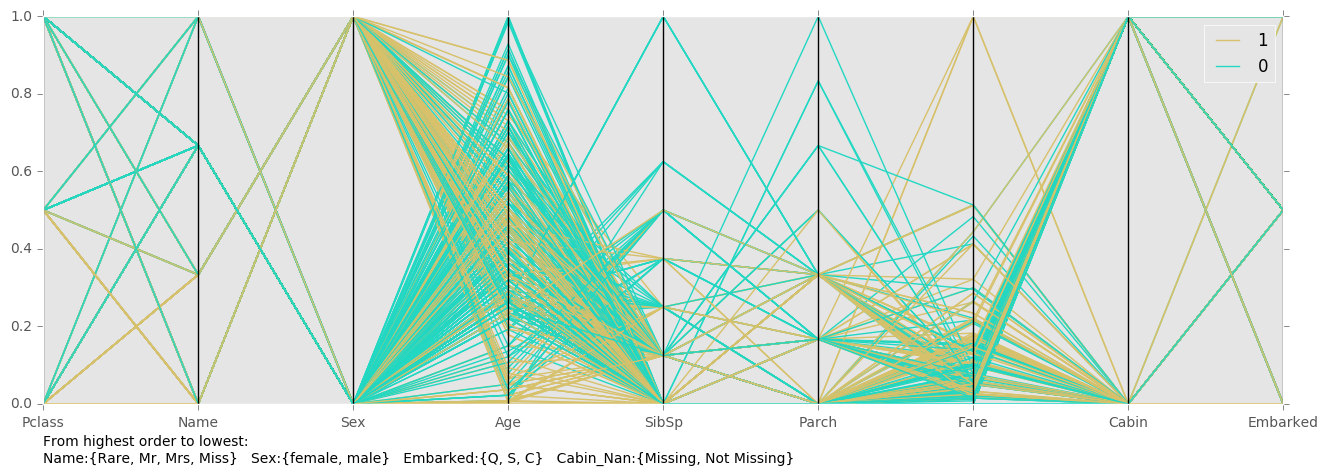

In [23]:
#Visualize in Parallel Coordinates
from pandas.tools.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(16,5))
T = MinMaxScaler().fit_transform(df_train)
T = pd.DataFrame(T,columns=df_train.columns)
T.Survived = T.Survived.astype(int)
parallel_coordinates(T,'Survived')
plt.text(0,-0.15,'From highest order to lowest: \nName:{Rare, Mr, Mrs, Miss}   Sex:{female, male}   Embarked:{Q, S, C}   Cabin_Nan:{Missing, Not Missing}')
plt.show()

Some findings from visualization:
Blah Blah Blah

In [24]:
y_train = df_train['Survived']
y_test = df_test['Survived']
df_train.drop('Survived',axis=1,inplace=True)
df_test.drop('Survived',axis=1,inplace=True)
X_train = df_train
X_test = df_test

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
#scaling data
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

#2 Modelling

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
#Validation Curve
def plt_vc(estimator,title, X, y, param_name, param_range, logspace = True):
    plt.figure()
    plt.title(title)
    plt.xlabel("Parameter")
    plt.ylabel("Score")
    plt.xlim()
    train_score, validation_score = validation_curve(estimator, X, y, param_name, param_range, cv=10, n_jobs=2)
    train_scores_mean = np.mean(train_score, axis=1)
    train_scores_std = np.std(train_score, axis=1)
    validation_scores_mean = np.mean(validation_score, axis=1)
    validation_scores_std = np.std(validation_score, axis=1)
    plt.grid()
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param_range, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(param_range, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    if logspace:
        plt.xscale('log',basex = 2)
    if not logspace:
        plt.xlim(min(param_range), max(param_range))
    plt.legend(loc="best")
    plt.show()    

In [46]:
#Learning Curve
def plt_lc(estimator,title, X, y, train_size = ):
    plt.figure()
    plt.title(title)
    plt.xlabel("Parameter")
    plt.ylabel("Score")
    train_score, validation_score = validation_curve(estimator, X, y, param_name, param_range, cv=10, n_jobs=2)
    train_scores_mean = np.mean(train_score, axis=1)
    train_scores_std = np.std(train_score, axis=1)
    validation_scores_mean = np.mean(validation_score, axis=1)
    validation_scores_std = np.std(validation_score, axis=1)
    plt.grid()
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param_range, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(param_range, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    if logspace:
        plt.xscale('log',basex = 2)
    if not logspace:
        plt.xlim(min(param_range), max(param_range))
    plt.legend(loc="best")
    plt.show()    

SyntaxError: invalid syntax (<ipython-input-46-3a1f73a32f07>, line 2)

In [45]:
np.logspace(-10,10,21,base=2.0)[0]

0.0009765625

Fit Logistic Regression Model

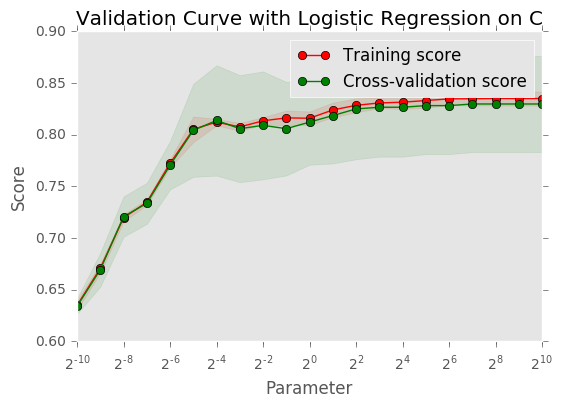

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
plt_vc(model, 'Validation Curve with Logistic Regression on C', X_train, y_train, 'C', np.logspace(-10, 10, 21, base = 2.0))

In [28]:
#Fine grid search for C
parameters = {'C':np.logspace(0, 4, 21, base = 2.0)}
clf_logreg = GridSearchCV(model, parameters)
clf_logreg.fit(X_train, y_train)
clf_logreg.best_estimator_

LogisticRegression(C=10.556063286183157, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Fit Decision Tree

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

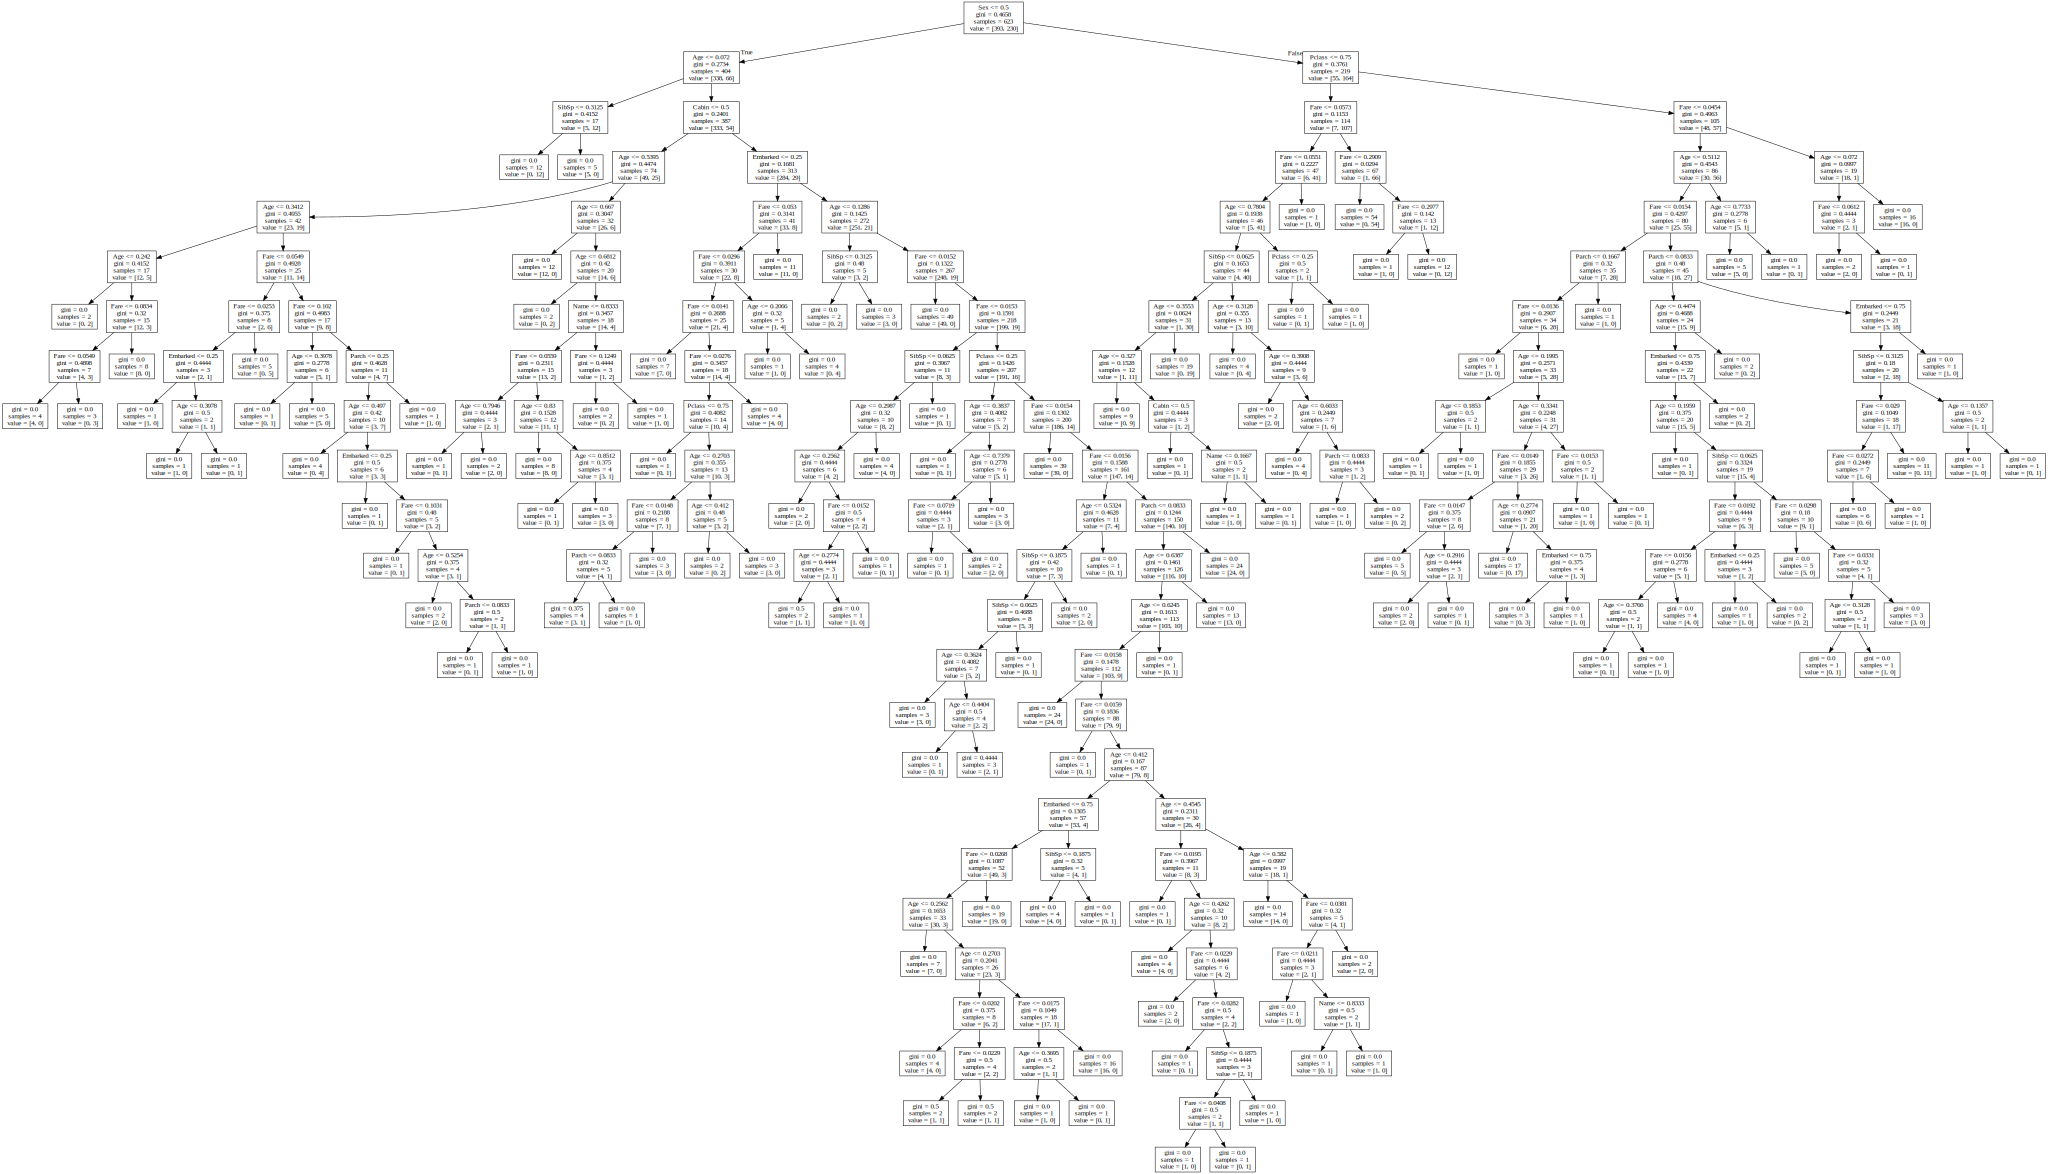

In [34]:
#Plot decision tree
import graphviz 
import StringIO
dotfile = StringIO.StringIO()
tree.export_graphviz(model, out_file="mytree.dot", feature_names = df_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

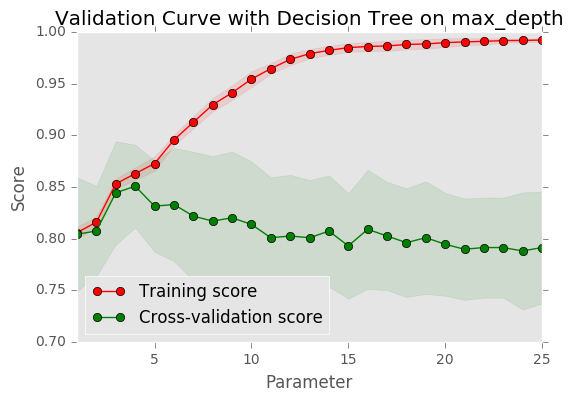

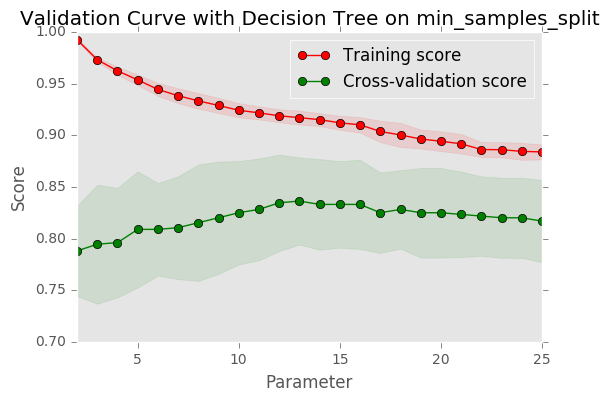

In [51]:
plt_vc(model, 'Validation Curve with Decision Tree on max_depth', X_train, y_train, 'max_depth', np.linspace(1, 25, 25, dtype='int'),logspace=False)
plt_vc(model, 'Validation Curve with Decision Tree on min_samples_split', X_train, y_train, 'min_samples_split', np.linspace(2, 25, 24, dtype='int'),logspace=False)

Fit Random Forest

Fit SVC

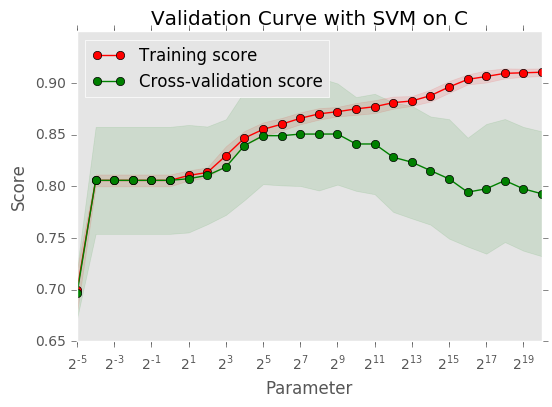

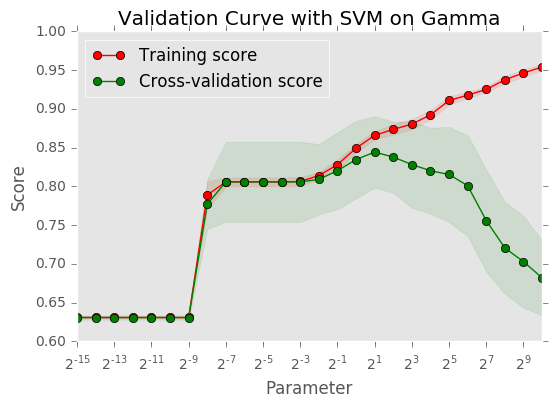

In [58]:
#Coarse parameter search
from sklearn.svm import SVC
model = SVC()
plt_vc(model, 'Validation Curve with SVM on C', X_train, y_train, 'C', np.logspace(-5, 20, 26, base = 2.0))
plt_vc(model, 'Validation Curve with SVM on Gamma', X_train, y_train, 'gamma', np.logspace(-15, 10, 26, base = 2.0))

In [90]:
#Fine grid search for C and Gamma
parameters = {'C':np.logspace(0, 10, 11, base = 2.0),'gamma':np.logspace(-1, 3, 11, base = 2.0)}
clf_svm = GridSearchCV(model, parameters)
clf_svm.fit(X_train, y_train)
clf_svm.best_estimator_

SVC(C=8.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Fit Adaboost

Fit Adaboost on RBF-SVM

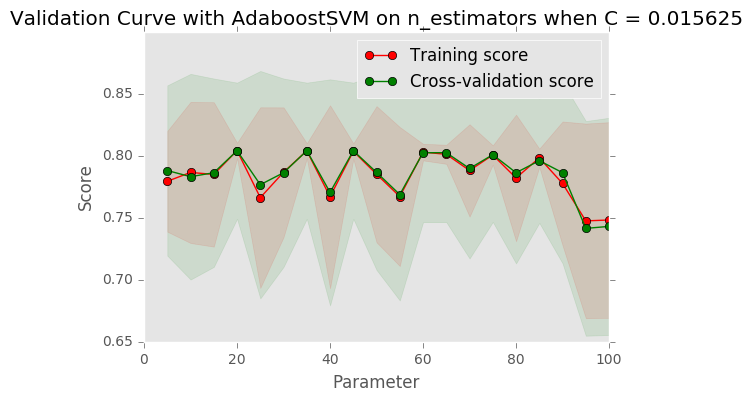

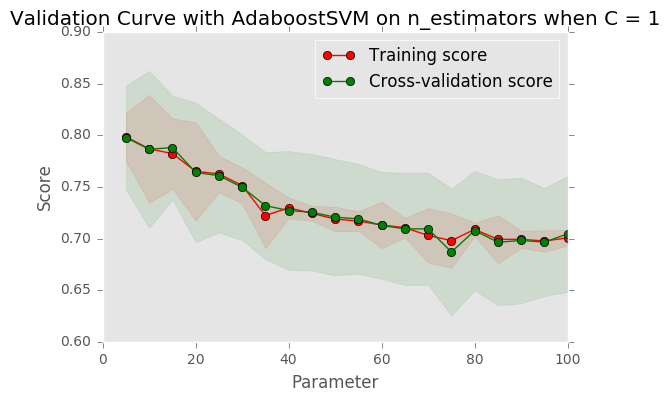

In [109]:
base_estimator = SVC(C = 1.0 / (2 ** 6),probability = True)
clf_AdaSVM1 = AdaBoostClassifier(base_estimator)
base_estimator = SVC(probability = True)
clf_AdaSVM2 = AdaBoostClassifier(base_estimator)
plt_vc(clf_AdaSVM1, 'Validation Curve with AdaboostSVM on n_estimators when C = 0.015625', X_train, y_train, 'n_estimators', np.linspace(5, 100, 20, dtype='int'), logspace=False)
plt_vc(clf_AdaSVM2, 'Validation Curve with AdaboostSVM on n_estimators when C = 1', X_train, y_train, 'n_estimators', np.linspace(5, 100, 20, dtype='int'), logspace=False)

In [129]:
clf_AdaSVM = AdaBoostClassifier(SVC(C = 1.0 / (2 ** 6),probability = True))
clf_AdaSVM.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=0.015625, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

Fit Adaboost Decision Tree

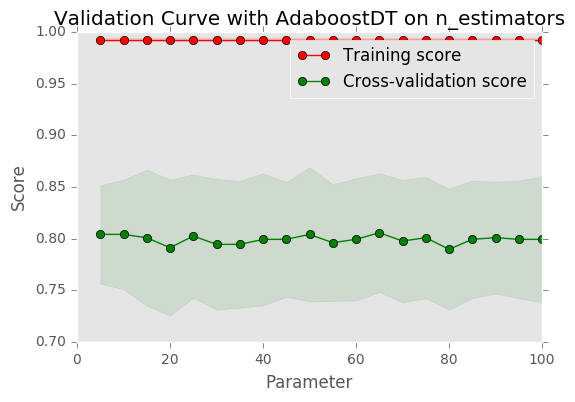

In [94]:
base_estimator = DecisionTreeClassifier()
clf_AdaDT = AdaBoostClassifier(base_estimator)
plt_vc(clf_AdaDT, 'Validation Curve with AdaboostDT on n_estimators', X_train, y_train, 'n_estimators', np.linspace(5, 100, 20, dtype='int'), logspace=False)

In [233]:
clf_AdaDT.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Construct reduced trianing set T' to handle overfit

In [227]:
import scipy.optimize as op
class ReducedSet:
    
    def plattll(self, theta, prob, y):
        A, B = theta
        p = 1.0 / (1 + np.exp(A * prob + B))
        return - np.sum((y * np.log(p) + (1 - y) * np.log(1 - p)))
    
    def platt(self, prob, y):
        ll = lambda *args: self.plattll(*args)
        result = op.minimize(ll, [1,1], args = (prob, y))
        A, B = result["x"]
        return A, B
    
    def getset(self, AdaBoost, X, y, K):
        p = np.zeros(X.shape[0])
        
        for i in range(K):
            X_set1, X_set2, y_set1, y_set2 = train_test_split(X, y, test_size = 0.7)
            AdaBoost.fit(X_set1, y_set1)
            prob = AdaBoost.predict_proba(X_set2)[:,1]
            A, B = self.platt(prob, y_set2)
            prob_whole = AdaBoost.predict_proba(X)[:,1]
            p += 1.0 / (1 + np.exp(A * prob_whole + B))
        
        p /= K
        
        ind = y_train.index.values
        ind_select_X = []
        ind_select_y = []
        
        for j in range(y.shape[0]):
            if y.loc[ind[j]] == 1:
                if p[j] > 0.5:
                    ind_select_X.append(j)
                    ind_select_y.append(ind[j])
            else:
                if p[j] < 0.5:
                    ind_select_X.append(j)
                    ind_select_y.append(ind[j]) 
        
        return(X[ind_select_X,:], y.loc[ind_select_y])
    

In [259]:
reduceset = ReducedSet()

In [261]:
#Reduced set for SVM
X_reduced, y_reduced = reduceset.getset(clf_AdaSVM, X_train, y_train, 50)
plt_vc(clf_AdaSVM, 'Validation Curve with AdaboostSVM on n_estimators', X_reduced, y_reduced, 'n_estimators', np.linspace(5, 100, 20, dtype='int'), logspace=False)
clf_AdaSVM_Reduced = AdaBoostClassifier(SVC(C = 1.0 / (2 ** 6),probability = True))
clf_AdaSVM_Reduced.fit(X_reduced, y_reduced)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

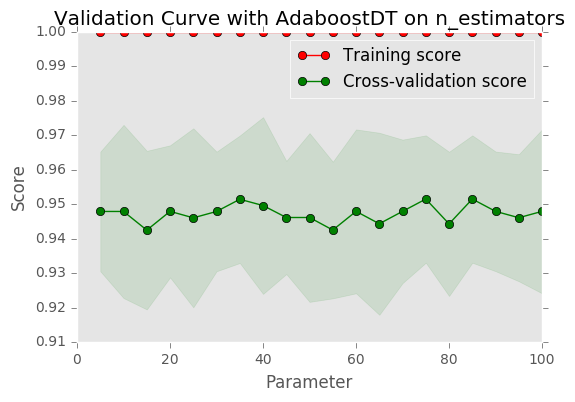

In [263]:
#Reduced set for DT
X_reduced, y_reduced = reduceset.getset(clf_AdaDT, X_train, y_train, 50)
plt_vc(clf_AdaDT, 'Validation Curve with AdaboostDT on n_estimators', X_reduced, y_reduced, 'n_estimators', np.linspace(5, 100, 20, dtype='int'), logspace=False)
clf_AdaDT_Reduced = AdaBoostClassifier(DecisionTreeClassifier())
clf_AdaDT_Reduced.fit(X_reduced, y_reduced)

#3 Evaluation (CV score & Final test score)

In [271]:
clf_logreg.score(X_test,y_test)

0.7649253731343284

In [62]:
#Prediction accuracy
clf_svm.score(X_test,y_test)

0.79104477611940294

In [265]:
clf_AdaSVM.score(X_test,y_test)

0.7425373134328358

In [262]:
clf_AdaDT.score(X_test, y_test)

0.76119402985074625

In [243]:
clf_AdaSVM_Reduced.score(X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=0.015625, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [ ]:
clf_AdaDT_Reduced.score(X_test, y_test)